#### HMA glacier elevatin change analysis by using data by Huggonet et al.(2021) .

In [13]:
# import warnings
# warnings.filterwarnings('ignore')
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt


In [14]:
path_hma_gtng = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_dhdt_2000_2019 = 'data/glaciers/gla-elev-change-hugonnet/tile_time_series/dh_world_tiles_0.5deg_rates.csv'


In [15]:
### read in data   
hma_gtng = gpd.read_file(path_hma_gtng)
hma_gtng = gpd.read_file(path_hma_gtng).to_crs(ccrs.PlateCarree().proj4_init)
dhdt = pd.read_csv(path_dhdt_2000_2019)
# hma_gtng.head()
dhdt.head()

,tile_lonmin,tile_latmin,tile_size,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt
0,-119.0,36.0,0.5,2000-01-01_2001-01-01,230000,0.510,4.559,117233.0,1048469.0,0.0001,0.0009
1,-119.0,36.0,0.5,2001-01-01_2002-01-01,230000,0.455,4.401,104614.0,1012126.0,0.0001,0.0009
2,-119.0,36.0,0.5,2002-01-01_2003-01-01,230000,0.419,4.298,96455.0,988467.0,0.0001,0.0008
3,-119.0,36.0,0.5,2003-01-01_2004-01-01,230000,0.422,4.177,97128.0,960611.0,0.0001,0.0008
4,-119.0,36.0,0.5,2004-01-01_2005-01-01,230000,0.409,4.102,94108.0,943430.0,0.0001,0.0008


In [16]:
### Select period of 2000-2019 and hma region
min_x, min_y, max_x, max_y = hma_gtng.total_bounds
dhdt_tiles_2000_2019 = dhdt[(dhdt['period']=='2000-01-01_2020-01-01') & (dhdt['tile_lonmin'] >= min_x) & (dhdt['tile_lonmin'] <= max_x) &
                       (dhdt['tile_latmin'] >= min_y) & (dhdt['tile_latmin'] <= max_y)                      
                      ]
print(dhdt_tiles_2000_2019.shape)
dhdt_tiles_2000_2019.head(5)


(864, 11)


,tile_lonmin,tile_latmin,tile_size,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt
132257,88.5,27.0,0.5,2000-01-01_2020-01-01,264000,-1.174,0.260,-309933.0,68463.0,-0.0003,0.0001
132299,100.0,27.0,0.5,2000-01-01_2020-01-01,5985000,-0.929,0.164,-5560062.0,981981.0,-0.0047,0.0009
132341,86.0,27.5,0.5,2000-01-01_2020-01-01,112610000,-0.573,0.090,-64549997.0,10160148.0,-0.0549,0.0095
132383,86.5,27.5,0.5,2000-01-01_2020-01-01,356397000,-0.516,0.073,-183930653.0,26008554.0,-0.1563,0.0247
132425,87.0,27.5,0.5,2000-01-01_2020-01-01,256167000,-0.386,0.085,-98974705.0,21818948.0,-0.0841,0.0195


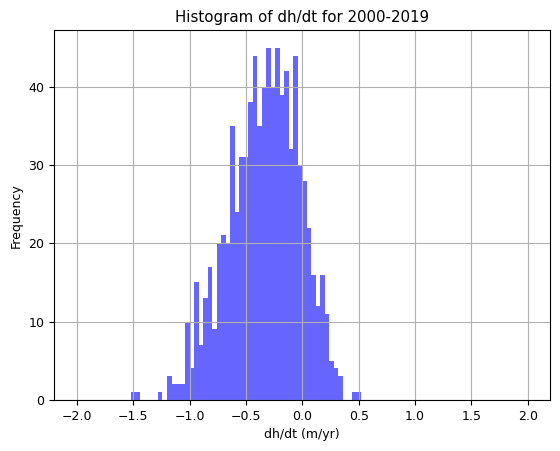

In [17]:
### plot histogram of dh/dt
dhdt_tiles_2000_2019['dhdt'].hist(bins=100, edgecolor='none', range=[-2, 2], facecolor='blue', alpha=0.6)
plt.xlabel('dh/dt (m/yr)')
plt.ylabel('Frequency')
plt.title('Histogram of dh/dt for 2000-2019')
plt.show()


In [18]:
hma_gtng_reproj = hma_gtng.to_crs(epsg=3857)
geo_centers = hma_gtng_reproj.geometry.centroid
geo_centers


0      POINT (7778393.522 4817188.623)
1      POINT (8128111.770 4612235.871)
2      POINT (8478384.878 5182829.519)
3      POINT (9731758.778 5429002.872)
4      POINT (8920976.980 4316581.121)
5     POINT (10100067.502 4447270.035)
6     POINT (11023642.429 4653294.345)
7      POINT (9787100.837 3861855.252)
8     POINT (10992733.528 3848747.659)
9      POINT (7810342.663 4207229.691)
10     POINT (8488612.353 4266160.207)
11     POINT (8597861.294 3896350.046)
12     POINT (9078787.960 3429748.136)
13    POINT (10037059.422 3230717.523)
14    POINT (11184156.033 3423044.196)
dtype: geometry

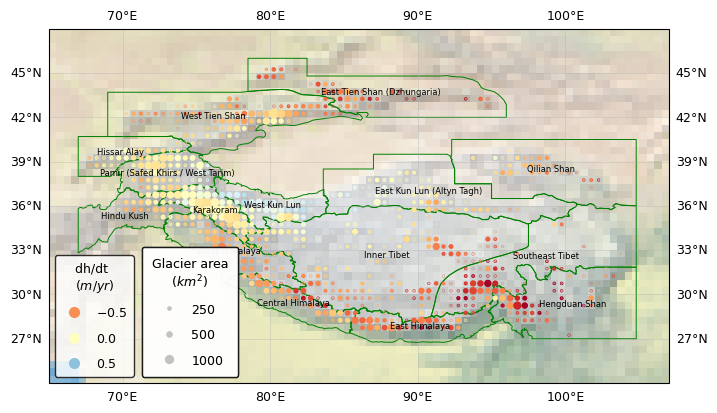

In [21]:
scale_size = 50
geo_centers = hma_gtng.geometry.centroid
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
for x, y, label in zip(geo_centers.x, geo_centers.y, hma_gtng['full_name']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center', transform=ccrs.PlateCarree())
scatter = ax.scatter(
        x = dhdt_tiles_2000_2019['tile_lonmin'].values+0.25,
        y = dhdt_tiles_2000_2019['tile_latmin'].values+0.25,
        s = dhdt_tiles_2000_2019['area'].values/(1_000_000 * scale_size),
        c = dhdt_tiles_2000_2019['dhdt'].values,
        cmap="RdYlBu",
        alpha=1, 
        linewidth=2,
        vmin=-1,
        vmax=1,
        transform=ccrs.PlateCarree(),
        )

# Produce a legend with the unique colors from the scatter
plt.rcParams.update({'font.size':9})
handles_1, labels_1 = scatter.legend_elements(prop="colors", num=[-0.5, 0, 0.5])
legend_color = ax.legend(handles_1, labels_1, loc="lower left", title="dh/dt \n($m/yr$)",
                        facecolor='white', edgecolor='black', borderpad=0.5, 
                        labelspacing=1, markerscale=1, 
                        fontsize=9)
num_scaled = [5, 10, 20]
handles_2, labels_2 = scatter.legend_elements(prop="sizes", num=num_scaled, alpha=0.2)
legend_glacier_area = ax.legend(handles_2, [num_scaled[0]*scale_size, num_scaled[1]*scale_size, num_scaled[2]*scale_size], loc="lower left", 
                                title="Glacier area\n     (${km^2}$)", 
                                edgecolor='black', borderpad=0.8, 
                                labelspacing=1, 
                                bbox_to_anchor=(0.14, 0.), 
                                markerscale=1.5, 
                                fontsize=9)
for handle in legend_glacier_area.legend_handles: handle.set_markeredgecolor('none')
ax.add_artist(legend_color)
ax.add_artist(legend_glacier_area)
